In [2]:
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import train_test_split

In [3]:
train_path = '../DATA/train_normalized_4labels.csv'
test_path = '../DATA/test_normalized_4labels.csv'

In [4]:
raw_data = pd.read_csv(train_path,index_col=0)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
data = pd.DataFrame()
n_sample = 24748
# 'CERTIFIED': 1502699, 'CERTIFIED-WITHDRAWN': 122582, 'WITHDRAWN': 54542, 'DENIED': 24748
for c in ['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN']:
    T = raw_data[raw_data['CASE_STATUS']==c].sample(n_sample)
    data = data.append(T)
data.columns = raw_data.columns

In [6]:
X = data.drop(columns = ['EMPLOYER_NAME','CASE_STATUS'])
y = data['CASE_STATUS']
T = {'CERTIFIED':0, 'CERTIFIED-WITHDRAWN':1, 'DENIED':2, 'WITHDRAWN':3}
y = list(map(lambda x:T[x],y))

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.05, random_state=42)
X_train

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,PREVAILING_WAGE,FULL_TIME_POSITION,total_wage,CASE_DURATION,EMPLOYMENT_DURATION,EMPLOYER_APPLICATION_COUNT,EMPLOYER_CERTIFIED_RATE,EMPLOYER_CERTIFIED-WITHDRAWN_RATE,EMPLOYER_DENIED_RATE,EMPLOYER_WITHDRAWN_RATE
1384937,0,0,0,0,0,0,0,0,0,0,...,0.022168,1,-0.011319,-0.250972,0.287013,-0.349111,0.384615,-0.530639,-0.198305,0.304754
1817333,0,0,0,0,0,0,0,0,0,1,...,-0.116828,1,0.019453,-0.196148,0.299776,-0.422923,-5.954209,-0.594953,15.762271,-0.497703
2355035,0,0,0,0,0,0,0,0,0,1,...,-0.018649,1,-0.011341,-0.203980,0.280632,4.131263,0.793613,-0.593721,-0.230566,-0.487184
1529779,0,0,0,0,0,0,0,0,0,0,...,-0.025859,1,-0.011345,-0.203980,-1.742276,-0.421827,0.799884,-0.594953,-0.232216,-0.497703
1254081,0,0,0,0,0,0,0,0,0,0,...,-0.021362,0,-0.011343,-0.235308,-4.939363,-0.422610,-0.164986,-0.594953,-0.232216,1.724364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105408,0,0,0,0,0,0,1,0,0,0,...,-0.003416,1,-0.011333,-0.203980,0.287013,1.302828,0.067702,0.161771,-0.163518,-0.301043
730883,0,0,0,0,0,0,0,0,0,0,...,-0.024579,0,-0.011345,-0.219644,0.299776,-0.422923,-5.954209,-0.594953,15.762271,-0.497703
1150490,0,0,0,0,0,0,0,0,0,0,...,0.012284,1,-0.011325,5.998921,0.293395,-0.409612,-1.152471,0.956265,0.142655,0.717490
515912,0,0,0,0,0,0,0,0,0,0,...,-0.012447,1,-0.011338,-0.196148,0.293395,-0.422818,0.799884,-0.594953,-0.232216,-0.497703


In [8]:
train_data = lightgbm.Dataset(X_train, label=y_train)
valid_data = lightgbm.Dataset(X_valid, label=y_valid)

In [9]:
parameters = {
    'objective': 'multiclass',
    'metric': 'multi_error',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_class':4,
    'deterministic':'true'
}

In [10]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=valid_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[1]	valid_0's multi_error: 0.339596
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.30404
[3]	valid_0's multi_error: 0.207475
[4]	valid_0's multi_error: 0.191111
[5]	valid_0's multi_error: 0.177778
[6]	valid_0's multi_error: 0.146061
[7]	valid_0's multi_error: 0.13596
[8]	valid_0's multi_error: 0.133939
[9]	valid_0's multi_error: 0.138384
[10]	valid_0's multi_error: 0.14202
[11]	valid_0's multi_error: 0.143838
[12]	valid_0's multi_error: 0.140202
[13]	valid_0's multi_error: 0.137778
[14]	valid_0's multi_error: 0.139596
[15]	valid_0's multi_error: 0.135758
[16]	v

In [11]:
def calculate_acc(y_test,y_pred):
    labels = [[0,0],[0,0],[0,0],[0,0]] #truth, correct
    for y,yp in zip(y_test,y_pred):
        labels[y][0] += 1
        if y == yp:
            labels[y][1] += 1
    for stat in range(4):
        labels[stat] = labels[stat][1]/labels[stat][0]
    return labels

In [12]:
y_pred = model.predict(X_train).argmax(axis=1)
print("Accuracy on training set:\n",list(zip(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN'],
               calculate_acc(y_train,y_pred))))

Accuracy on training set:
 [('CERTIFIED', 0.9263646823198534), ('CERTIFIED-WITHDRAWN', 0.9606851411084665), ('DENIED', 0.8678058318456177), ('WITHDRAWN', 0.8356362399557842)]


In [13]:
y_pred = model.predict(X_valid).argmax(axis=1)
print("Accuracy on validation set:\n",list(zip(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN'],
               calculate_acc(y_valid,y_pred))))

Accuracy on validation set:
 [('CERTIFIED', 0.9242779078844653), ('CERTIFIED-WITHDRAWN', 0.9581967213114754), ('DENIED', 0.8420621931260229), ('WITHDRAWN', 0.8255908720456397)]


In [14]:
data = pd.read_csv(test_path,index_col=0)
X_test = data.drop(columns = ['EMPLOYER_NAME','CASE_STATUS'])
y_test = data['CASE_STATUS']
del(data)
T = {'CERTIFIED':0, 'CERTIFIED-WITHDRAWN':1, 'DENIED':2, 'WITHDRAWN':3}
y_test = list(map(lambda x:T[x],y_test))

In [15]:
y_pred = model.predict(X_test).argmax(axis=1)
print("Accuracy on test set:\n",list(zip(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN'],
               calculate_acc(y_test,y_pred))))

Accuracy on test set:
 [('CERTIFIED', 0.9170454104329868), ('CERTIFIED-WITHDRAWN', 0.9532121442847625), ('DENIED', 0.8521591551951725), ('WITHDRAWN', 0.8213903743315508)]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

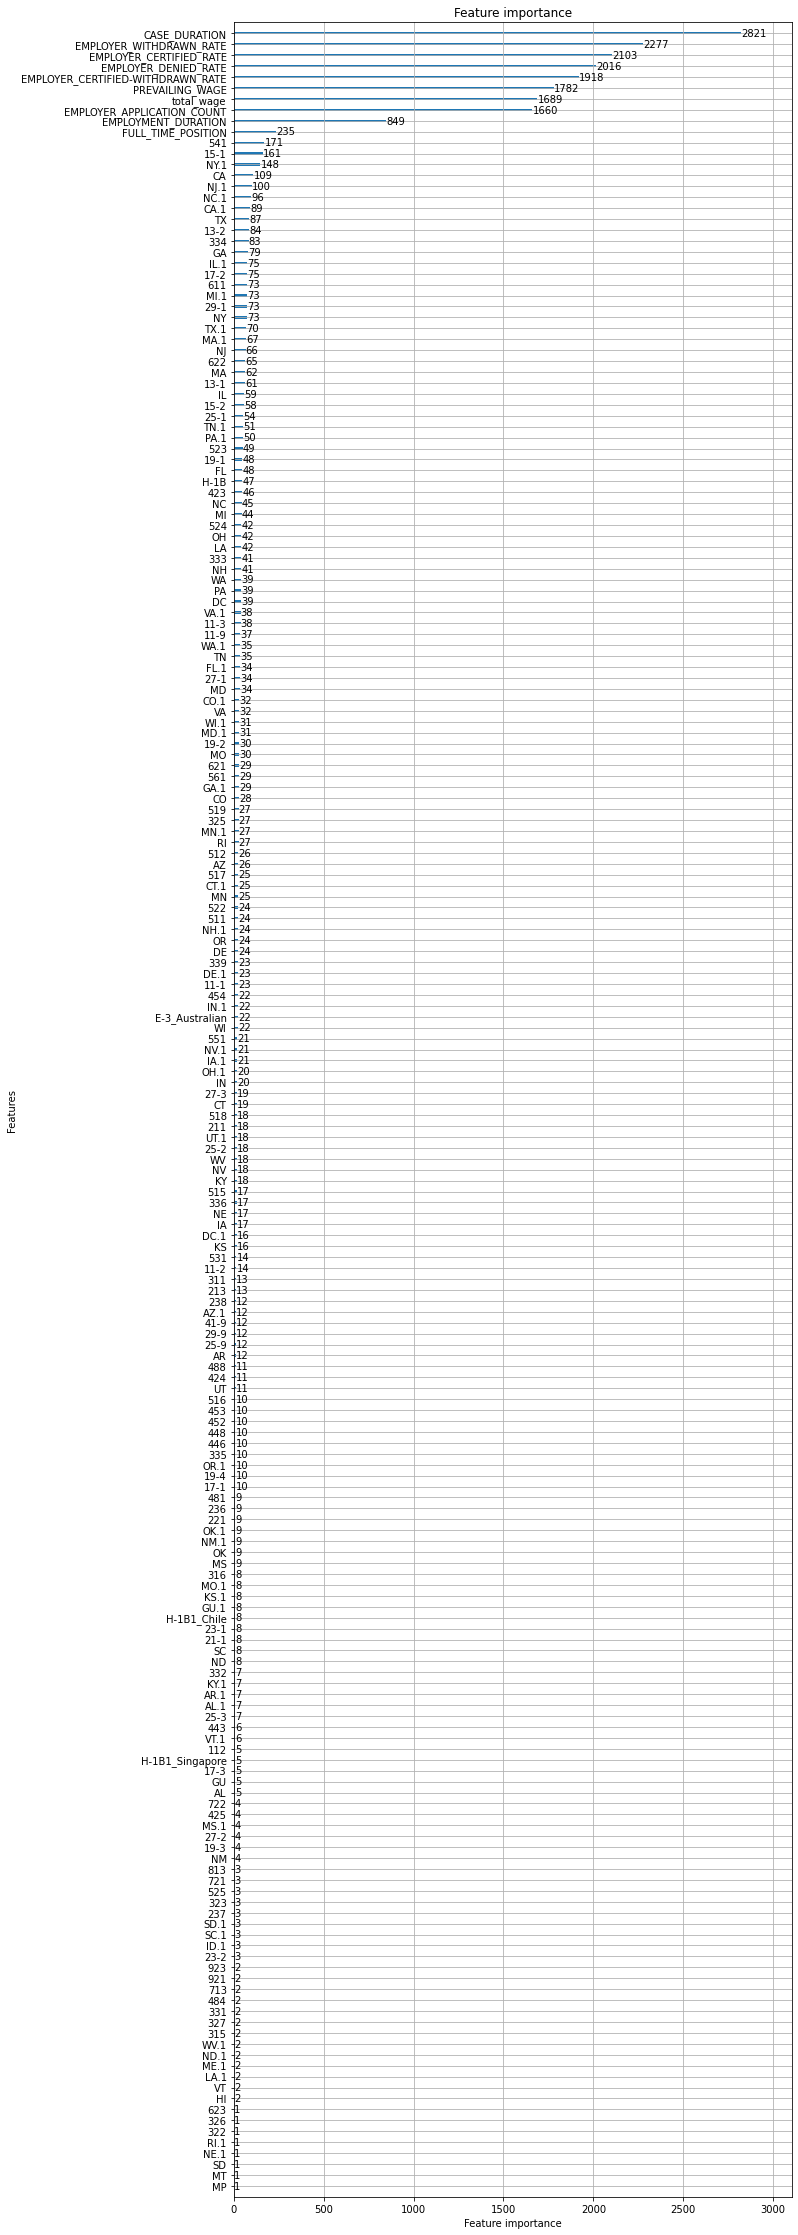

In [16]:
lightgbm.plot_importance(model, figsize=(10, 40))


In [17]:
import pickle
filename = '../saved_models/ensambledTree_downsampling.sav'
pickle.dump(model, open(filename, 'wb'))
